## 1. Importing required Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

## 2. Importing given Dataset

In [24]:
df = pd.read_csv("Dataset.csv")
df.head()

,Height,Weight
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72


## Simply plotting the given data to identify visible(which are easily visible to naked eye) clusters

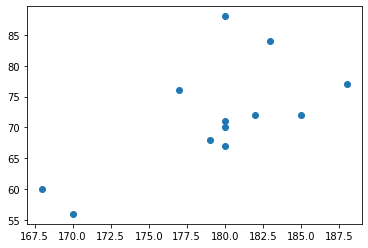

In [25]:
plt.scatter(df.Height, df.Weight)

## Now Pre-process the given Dataset

In [34]:
scaler = MinMaxScaler()
scaler.fit(df[['Height']])
df['Height'] = scaler.transform(df[['Height']])

scaler.fit(df[['Weight']])
df['Weight'] = scaler.transform(df[['Weight']])
df

,Height,Weight,cluster
0,0.85,0.50000,1
1,0.10,0.00000,0
2,0.00,0.12500,0
3,0.55,0.37500,1
4,0.70,0.50000,1
5,1.00,0.65625,1
6,0.60,0.46875,1
7,0.60,0.43750,1
8,0.75,0.87500,1
9,0.60,1.00000,1


## Applying `KMeans` function on the given dataset by setting `no. of clusters` to visible no. of clusters i.e. `2`

In [29]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [30]:
y_predicted = km.fit_predict(df[['Height','Weight']])
y_predicted

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
df['cluster'] = y_predicted
df.head()

,Height,Weight,cluster
0,185,72,1
1,170,56,0
2,168,60,0
3,179,68,1
4,182,72,1


## Identifying Cluster Centers

In [37]:
centroids = km.cluster_centers_
centroids

array([[0.67    , 0.578125],
       [0.05    , 0.0625  ]])

## Clustering based on visible clusters

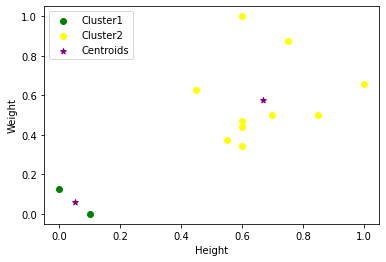

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1[['Height']], df1[['Weight']], color='green', label='Cluster1')
plt.scatter(df2[['Height']], df2[['Weight']], color='yellow', label='Cluster2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')

## Best method to Identify `no. of clusters` is `Elbow Point Method` which is processed bby `SSE(Sum Squared Error)` of the data

In [41]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Height','Weight']])
    sse.append(km.inertia_)

In [42]:
sse

[1.7421451822916665,
 0.6583632812500002,
 0.3009300595238095,
 0.13879557291666667,
 0.08412890624999989,
 0.054765624999999984,
 0.03570312499999993,
 0.022890624999999973,
 0.010358072916666567]

## Now Plot the SSE of the Data and find a point which forms an ***elbow shape*** in the graph this gives us the *correct* `no. of clusters` of the given `DATA`

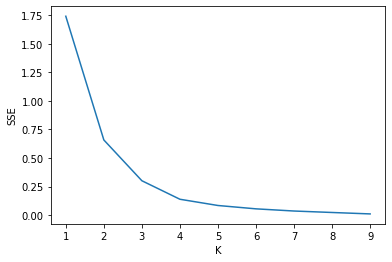

In [43]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

## Here `Elbow point` ***= 0.2***

In [45]:
df

,Height,Weight,cluster
0,0.85,0.50000,1
1,0.10,0.00000,0
2,0.00,0.12500,0
3,0.55,0.37500,1
4,0.70,0.50000,1
5,1.00,0.65625,1
6,0.60,0.46875,1
7,0.60,0.43750,1
8,0.75,0.87500,1
9,0.60,1.00000,1


In [46]:
df.drop('cluster',axis='columns')

,Height,Weight
0,0.85,0.50000
1,0.10,0.00000
2,0.00,0.12500
3,0.55,0.37500
4,0.70,0.50000
5,1.00,0.65625
6,0.60,0.46875
7,0.60,0.43750
8,0.75,0.87500
9,0.60,1.00000


## Now keeping `no. of clusters` ***= 4*** we repeat the Same Process above

In [53]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [54]:
y_predicted = km.fit_predict(df[['Height','Weight']])
y_predicted

array([3, 0, 0, 1, 1, 3, 1, 1, 2, 2, 1, 1])

In [55]:
df['cluster'] = y_predicted
df

,Height,Weight,cluster
0,0.85,0.50000,3
1,0.10,0.00000,0
2,0.00,0.12500,0
3,0.55,0.37500,1
4,0.70,0.50000,1
5,1.00,0.65625,3
6,0.60,0.46875,1
7,0.60,0.43750,1
8,0.75,0.87500,2
9,0.60,1.00000,2


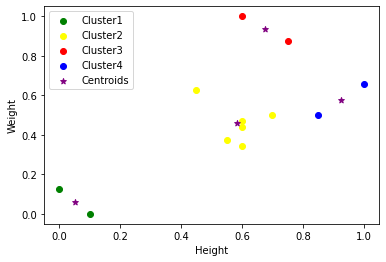

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1[['Height']], df1[['Weight']], color='green', label='Cluster1')
plt.scatter(df2[['Height']], df2[['Weight']], color='yellow', label='Cluster2')
plt.scatter(df3[['Height']], df3[['Weight']], color='red', label='Cluster3')
plt.scatter(df4[['Height']], df4[['Weight']], color='blue', label='Cluster4')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')